In [1]:
#spectrogram processer2

In [2]:
import librosa
import pandas
import matplotlib.pyplot as plt
import os
import pickle
import librosa
import numpy as np
import json
import librosa.display
import IPython.display as ipd

In [3]:
class Loader:
    """Loader is responsible for loading an audio file."""

    def __init__(self, sample_rate, mono):
        self.sample_rate = sample_rate
        self.mono = mono

    def load(self, file_path):
        signal = librosa.load(file_path,
                              sr=self.sample_rate,
                              mono=self.mono)[0]
        return signal   


In [4]:
class MelSpectrogramExtractor:
    """ extracts mel spectograms (in db) from a time series signal """
    def __init__(self, frame_size, hop_length):
        self.frame_size = frame_size
        self.hop_length = hop_length
        
    def extract(self, signal):
        spec = librosa.feature.melspectrogram(y = signal)
        mel_spectrogram = librosa.amplitude_to_db(spec, ref = np.max)
        return mel_spectrogram

In [5]:
class Saver:
    """ saver is responsible to save features """

    def __init__(self, feature_save_dir):
        self.feature_save_dir = feature_save_dir

    def save_feature(self, feature, file_path):
        save_path = self._generate_save_path(file_path)
        np.save(save_path, feature)

    
    def _save(data, save_path):
        with open(save_path, "wb") as f:
            pickle.dump(data, f)

    def _generate_save_path(self, file_path):
        file_name = os.path.split(file_path)[1]
        save_path = os.path.join(self.feature_save_dir, file_name + ".npy")
        return save_path

In [6]:
class PreprocessingPipeline:

    def __init__(self):
        self.extractor = None
        self.normaliser = None
        self.saver = None
        self._loader = None
        #self._num_expected_samples = None

    
    def loader(self):
        return self._loader

    def process(self, audio_files_dir):
        for root, _, files in os.walk(audio_files_dir):
            for file in files:
                file_path = os.path.join(root, file)
                self._process_file(file_path)
                print(f"Processed file {file_path}")
        
    def _process_file(self, file_path):
        signal = self.loader.load(file_path)
        feature = self.extractor.extract(signal)
        save_path = self.saver.save_feature(feature, file_path)


In [7]:
if __name__ == "__main__":
    FRAME_SIZE = 512
    HOP_LENGTH = 256
    SAMPLE_RATE = 16000
    MONO = True

    SPECTROGRAMS_SAVE_DIR = "Desktop/spectrograms"
    FILES_DIR = "demo"

    # instantiate all objects
    loader = Loader(SAMPLE_RATE, MONO)
    mel_spectrogram_extractor = MelSpectrogramExtractor(FRAME_SIZE, HOP_LENGTH)
    saver = Saver(SPECTROGRAMS_SAVE_DIR)

    preprocessing_pipeline = PreprocessingPipeline()
    preprocessing_pipeline.loader = loader
    preprocessing_pipeline.extractor = mel_spectrogram_extractor
    preprocessing_pipeline.saver = saver

    preprocessing_pipeline.process(FILES_DIR)

Processed file demo\101415-3-0-2.wav
Processed file demo\101415-3-0-3.wav
Processed file demo\101415-3-0-8.wav
Processed file demo\102106-3-0-0.wav
Processed file demo\102305-6-0-0.wav
Processed file demo\102842-3-0-1.wav
Processed file demo\102842-3-1-0.wav
Processed file demo\102842-3-1-5.wav
Processed file demo\102842-3-1-6.wav
Processed file demo\103074-7-0-0.wav
Processed file demo\103074-7-0-1.wav
Processed file demo\103074-7-0-2.wav
Processed file demo\103074-7-1-0.wav
Processed file demo\103074-7-1-1.wav
Processed file demo\103074-7-1-2.wav
Processed file demo\103074-7-1-3.wav
Processed file demo\103074-7-1-4.wav
Processed file demo\103074-7-1-5.wav
Processed file demo\103074-7-1-6.wav
Processed file demo\103074-7-2-0.wav
Processed file demo\103074-7-3-0.wav
Processed file demo\103074-7-3-1.wav
Processed file demo\103074-7-3-2.wav
Processed file demo\103074-7-3-3.wav
Processed file demo\103074-7-4-0.wav
Processed file demo\103074-7-4-1.wav
Processed file demo\103074-7-4-2.wav
P

C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=800
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=960
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1105
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1745
  return f(*args, **kwargs)


Processed file demo\87275-1-5-0.wav
Processed file demo\88466-7-0-0.wav
Processed file demo\89212-3-0-0.wav
Processed file demo\89948-5-0-0.wav
Processed file demo\9031-3-1-0.wav
Processed file demo\9031-3-2-0.wav
Processed file demo\9031-3-3-0.wav
Processed file demo\9031-3-4-0.wav
Processed file demo\94868-1-0-0.wav
Processed file demo\94868-1-1-0.wav
Processed file demo\94868-1-2-0.wav
Processed file demo\96158-4-0-0.wav
Processed file demo\97317-2-0-22.wav
Processed file demo\97317-2-0-23.wav
Processed file demo\97317-2-0-25.wav
Processed file demo\97317-2-0-28.wav
Processed file demo\97317-2-0-34.wav
Processed file demo\97317-2-0-36.wav
Processed file demo\97317-2-0-5.wav
Processed file demo\98223-7-0-0.wav
Processed file demo\98223-7-1-0.wav
Processed file demo\98223-7-10-0.wav
Processed file demo\98223-7-2-0.wav
Processed file demo\98223-7-3-0.wav
Processed file demo\98223-7-4-0.wav
Processed file demo\98223-7-5-0.wav
Processed file demo\98223-7-6-0.wav
Processed file demo\98223

[[-38.45302  -12.350655  -9.391476 ... -80.       -80.       -80.      ]
 [-36.920097 -14.187853 -15.713837 ... -80.       -80.       -80.      ]
 [-49.635918 -29.547428 -29.532976 ... -80.       -80.       -80.      ]
 ...
 [-80.       -66.241615 -68.63354  ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


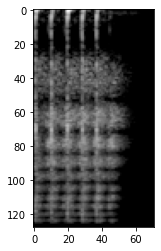

In [8]:
demo = np.load("spec save/7061-6-0-0.wav.npy")
print(demo)
plt.imshow(demo, cmap='gray')
plt.show()

In [9]:
demo = np.load("spec save/7383-3-0-0.wav.npy")
print(demo)

[[-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -76.40078 -75.38676 ... -80.      -80.      -80.     ]
 ...
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]]


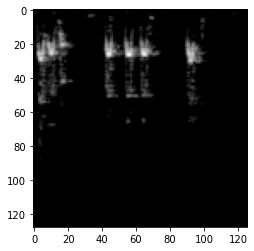

In [10]:
plt.imshow(demo, cmap='gray')
plt.show()